In [1]:
#Data analysis practice with AIFS data from ECMWF 
#https://www.ecmwf.int/en/forecasts/datasets/open-data

In [ ]:
import cfgrib 
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
file_pt="/Volumes/YagizHDD/Meteorological-Applications/DATA/AIFS/merged_20250228000000_00_to_48.grib2"
df = xr.open_dataset(file_pt,engine="cfgrib")

skipping variable: paramId==228026 shortName='mx2t3'
Traceback (most recent call last):
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
    ...<2 lines>...
    )
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(10.0)) new_value=Variable(dimensions=(), data=np.float64(2.0))
skipping variable: paramId==228027 shortName='mn2t3'
Traceback (most recent call last):
  File "/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
    ~~~~~~~~~~^^^^^^^^^^

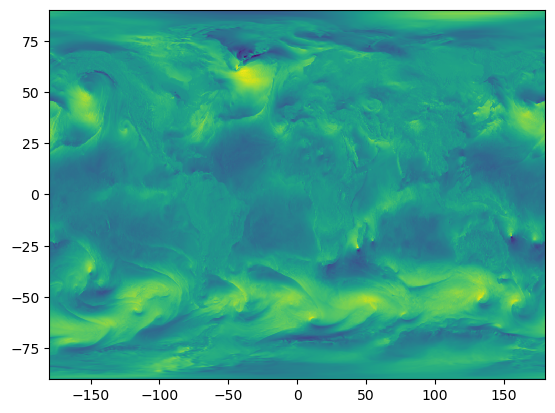

In [ ]:
df
plt.pcolormesh(df.longitude,df.latitude,df.u[0,0,:,:])


In [111]:
#Finding wanted latitude and longitude

def wanted_lat_lon(df,lat,lon):
    lat_num=((max(df.latitude)-lat)*abs(1/(df.latitude[0]-df.latitude[1]))).round() # wanted latitude for spesific point
    lon_num=(abs(min(df.longitude)-lon)*abs(1/(df.longitude[0]-df.longitude[1]))).round() # wanted longitude for spesific point
    print(f"Latitude number is: {int(lat_num)}") 
    print(f"Longitude number is: {int(lon_num)}")
    return int(lat_num), int(lon_num)
    


In [112]:
lat_num, lon_num = wanted_lat_lon(df,41.08,28.9) #Give dataframe, wanted latitude and wanted longitude

Latitude number is: 196
Longitude number is: 836


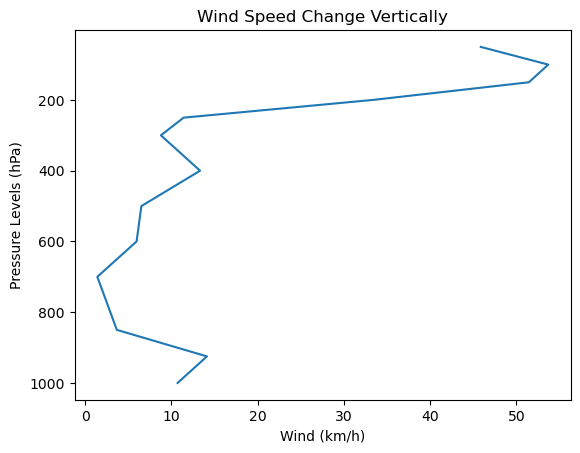

In [114]:
levels = df.isobaricInhPa
wind=df.u[0,0:len(levels),lat_num,lon_num]*3.6
plt.plot(abs(wind),levels) # Vertical wind speed change (absolute wind plotted due to direction)
plt.xlabel("Wind (km/h)")
plt.ylabel("Pressure Levels (hPa)")
plt.title( "Wind Speed Change Vertically")
plt.gca().invert_yaxis()

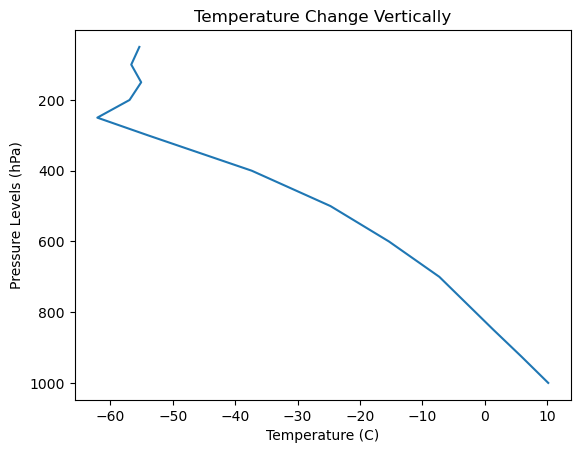

In [115]:
temp=df.t[0,0:len(levels),lat_num,lon_num]-273.15
plt.plot(temp,levels) # Vertical wind speed change according to 
plt.xlabel("Temperature (C)")
plt.ylabel("Pressure Levels (hPa)")
plt.title( "Temperature Change Vertically")
plt.gca().invert_yaxis()

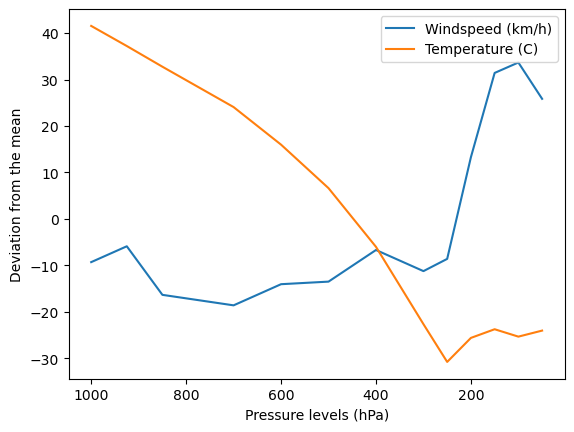

In [116]:
plt.plot(levels,abs(wind)-(abs(wind).mean()),label="Windspeed (km/h)")
plt.plot(levels,temp-temp.mean(),label = "Temperature (C)")
plt.legend()
plt.xlabel("Pressure levels (hPa)")
plt.ylabel("Deviation from the mean")
plt.gca().invert_xaxis()


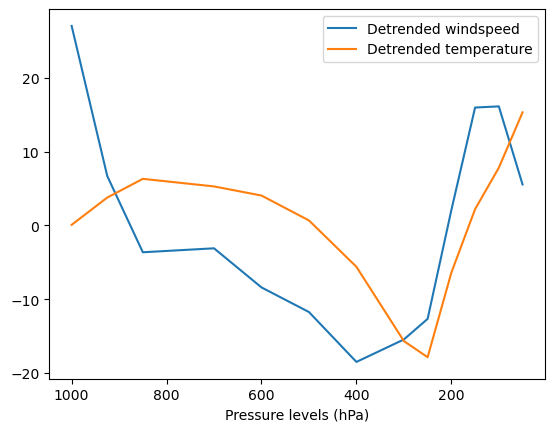

In [61]:
#DETREND
from scipy.signal import detrend
plt.plot(levels,detrend(abs(wind),type="linear"),label="Detrended windspeed")
plt.plot(levels,detrend(temp,type="linear"),label="Detrended temperature")
plt.legend()
plt.xlabel("Pressure levels (hPa)")
plt.gca().invert_xaxis()

In [117]:
lat_N, lon_W= wanted_lat_lon(df,42.1,25.46) #Marmara Region
lat_S, lon_E= wanted_lat_lon(df,39.21,31.01)

lat=df.latitude[lat_N:lat_S+1]
lon=df.longitude[lon_W:lon_E+1]


Latitude number is: 192
Longitude number is: 822
Latitude number is: 203
Longitude number is: 844


Text(0.5, 1.0, ' 28 February 00:00 UTC Forecast AIFS at 1000 hPa ')

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


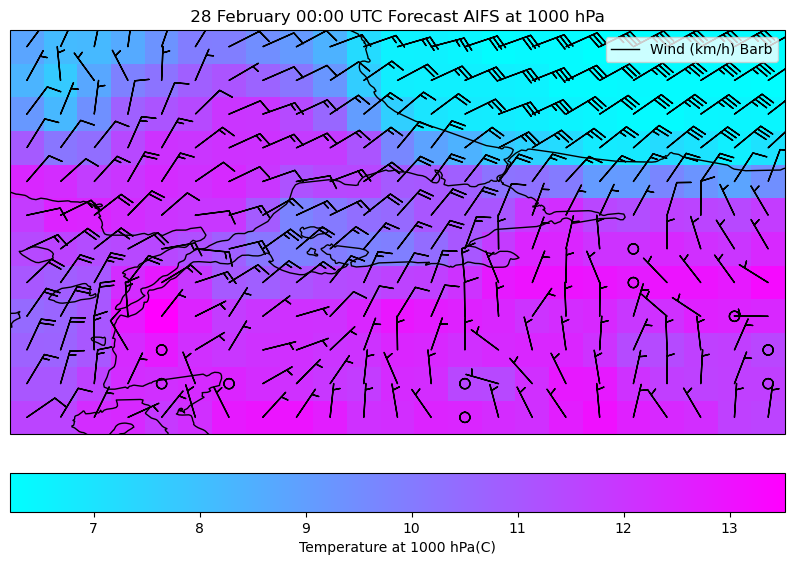

In [110]:
wind_1000_u= df.u[0,0,lat_N:lat_S+1,lon_W:lon_E+1]*3.6
wind_1000_v= df.v[0,0,lat_N:lat_S+1,lon_W:lon_E+1]*3.6
temp_1000= df.t[0,0,lat_N:lat_S+1,lon_W:lon_E+1]-273.15

import cartopy.crs as ccrs
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10,15),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
b=plt.pcolormesh(lon,lat,temp_1000,cmap="cool")
plt.barbs(lon,lat,wind_1000_u,wind_1000_v)
a=plt.colorbar(b,orientation="horizontal",anchor=(0, 2), shrink=1)
legend_handles = [
    Line2D([0], [0], color="black", lw=1, label="Wind (km/h) Barb")
]
# Add legend
plt.legend(handles=legend_handles, loc="upper right")
a.set_label("Temperature at 1000 hPa(C)")
plt.title(" 28 February 00:00 UTC Forecast AIFS at 1000 hPa ")